In [1]:
import numpy as np
from keras.models import Sequential
from keras.preprocessing import sequence
from keras.layers import Dropout
from keras.layers import  Dense, Embedding, LSTM, Bidirectional

In [2]:
from keras.datasets import imdb
(x_train, y_train),(x_test, y_test) = imdb.load_data(num_words=10000)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
max_len = 200
x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)
y_test = np.array(y_test)
y_train = np.array(y_train)

In [13]:
n_unique_words = 10000

In [14]:
model = Sequential()
model.add(Embedding(n_unique_words, 128, input_length=max_len))
model.add(Bidirectional(LSTM(64)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [16]:
history=model.fit(x_train, y_train,
           batch_size=1000,
           epochs=12,
           validation_data=[x_test, y_test])
print(history.history['loss'])
print(history.history['accuracy'])

Epoch 1/12
25/25 ━━━━━━━━━━━━━━━━━━━━ 141s 6s/step - accuracy: 0.7536 - loss: 0.5343 - val_accuracy: 0.8284 - val_loss: 0.4085
Epoch 2/12
25/25 ━━━━━━━━━━━━━━━━━━━━ 138s 6s/step - accuracy: 0.8629 - loss: 0.3434 - val_accuracy: 0.8628 - val_loss: 0.3261
Epoch 3/12
25/25 ━━━━━━━━━━━━━━━━━━━━ 146s 6s/step - accuracy: 0.9126 - loss: 0.2362 - val_accuracy: 0.8600 - val_loss: 0.3239
Epoch 4/12
25/25 ━━━━━━━━━━━━━━━━━━━━ 199s 6s/step - accuracy: 0.9325 - loss: 0.1986 - val_accuracy: 0.8662 - val_loss: 0.3195
Epoch 5/12
25/25 ━━━━━━━━━━━━━━━━━━━━ 148s 6s/step - accuracy: 0.9467 - loss: 0.1597 - val_accuracy: 0.8656 - val_loss: 0.3659
Epoch 6/12
25/25 ━━━━━━━━━━━━━━━━━━━━ 139s 6s/step - accuracy: 0.9631 - loss: 0.1221 - val_accuracy: 0.8590 - val_loss: 0.4181
Epoch 7/12
25/25 ━━━━━━━━━━━━━━━━━━━━ 143s 6s/step - accuracy: 0.9632 - loss: 0.1171 - val_accuracy: 0.8640 - val_loss: 0.3613
Epoch 8/12
25/25 ━━━━━━━━━━━━━━━━━━━━ 139s 6s/step - accuracy: 0.9691 - loss: 0.1031 - val_accuracy: 0.8609 - v

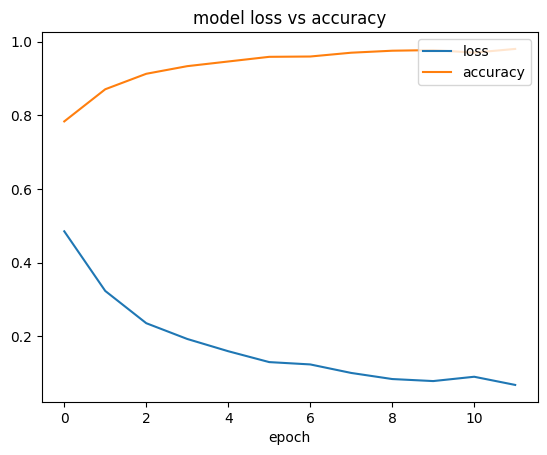

In [17]:
from matplotlib import pyplot
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['accuracy'])
pyplot.title('model loss vs accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['loss', 'accuracy'], loc='upper right')
pyplot.show()